In [52]:
install.packages("glmnet")
install.packages("caret")
install.packages("dplyr")
install.packages("pROC")
install.packages("rsample")
install.packages("randomForest")


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpdLXewk/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpdLXewk/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpdLXewk/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpdLXewk/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpdLXewk/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpdLXewk/downloaded_packages


In [3]:
library(glmnet)
library(caret)
library(dplyr)
library(pROC)
library(rsample)
library(randomForest)

Loading required package: Matrix

Loaded glmnet 4.1-8

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Warning message:
"package 'randomForest' was built under R version 4.3.3"
randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin




# Import and format data

In [4]:
#read in the data
data <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression_2_(web_to_serviceable)/regression_tables/fieldwork_regression_table.csv")
data$scaled_score <- data$score_min/5
data$logistic_transformed_score <- plogis(data$scaled_score)
trim_data <- data %>% select(-identifier,-score_min, - scaled_score,  -serviceable_agg, -score_ellen, -score_aadya, -serviceable_ellen, -serviceable_aadya)

# Build a model

In [5]:
model <- lm(logistic_transformed_score ~ ., data = trim_data)
summary(model)


Call:
lm(formula = logistic_transformed_score ~ ., data = trim_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.065312 -0.012229 -0.000162  0.011500  0.057464 

Coefficients: (3 not defined because of singularities)
                                                     Estimate Std. Error
(Intercept)                                         7.334e-01  1.139e-01
IT01V_packetsRecieved_ellen                         3.676e-04  2.811e-03
IT01V_packetsRecieved_aadya                         1.804e-03  2.671e-03
IT01V_packetsLost_ellen                            -1.959e-03  2.544e-03
IT01V_packetsLost_aadya                             1.600e-03  1.295e-03
IT01V_frameWidth_ellen                              1.440e-04  2.482e-04
IT01V_frameWidth_aadya                              4.790e-05  5.111e-05
IT01V_frameHeight_ellen                                    NA         NA
IT01V_frameHeight_aadya                                    NA         NA
IT01V_totalFreezesDuration_ell

# Penalised regression

## Lasso/ Ridge

In [6]:
X <- model.matrix(logistic_transformed_score ~ ., data = trim_data)[,-1]
y <- trim_data$logistic_transformed_score

# Fit the lasso model (alpha = 1 for Lasso)
lasso_model <- glmnet(X, y, alpha = 1)

# Predict on training data
lasso_predictions <- predict(lasso_model, X)

# Calculate MSE for lasso model
mse_lasso <- mean((y - lasso_predictions)^2)

In [7]:
# Fit the ridge model (alpha = 0)
ridge_model <- glmnet(X, y, alpha = 0)

# Predict on training data
ridge_predictions <- predict(ridge_model, X)

# Calculate MSE for lasso model
mse_ridge <- mean((y - ridge_predictions)^2)

## AIC

In [41]:
fit_aic <- step(model)
summary(fit_aic)

aic_predictions <- predict(fit_aic, trim_data)
# par(bg = "white")
# options(repr.plot.width = 10, repr.plot.height = 6)
# plot(predictions, trim_data$logistic_transformed_score, 
#      main = "Prediction performance of AIC stepfit model", 
#      xlab = "Predicted values", ylab = "Recorded values")

# Calculate Mean Squared Error (MSE)
mse_aic <- mean((trim_data$logistic_transformed_score - aic_predictions)^2)

Start:  AIC=-609.11
logistic_transformed_score ~ IT01V_packetsRecieved_ellen + IT01V_packetsRecieved_aadya + 
    IT01V_packetsLost_ellen + IT01V_packetsLost_aadya + IT01V_frameWidth_ellen + 
    IT01V_frameWidth_aadya + IT01V_frameHeight_ellen + IT01V_frameHeight_aadya + 
    IT01V_totalFreezesDuration_ellen + IT01V_totalFreezesDuration_aadya + 
    IT01V_framesPerSecond_ellen + IT01V_framesPerSecond_aadya + 
    IT01V_bytesReceived_in_bits_s_ellen + IT01V_bytesReceived_in_bits_s_aadya + 
    IT01V_totalProcessingDelay_ellen + IT01V_totalProcessingDelay_aadya + 
    IT01V_jitter_ellen + IT01V_jitter_aadya + IT01V_jitterBufferDelay_emissions_ellen + 
    IT01V_jitterBufferDelay_emissions_aadya + IT01A_bytesReceived_in_bits_s_ellen + 
    IT01A_bytesReceived_in_bits_s_aadya + IT01A_jitterBufferDelay_emissions_ellen + 
    IT01A_jitterBufferDelay_emissions_aadya + OT01V_packetsSent_s_ellen + 
    OT01V_packetsSent_s_aadya + OT01V_bytesSent_in_bits_s_ellen + 
    OT01V_bytesSent_in_bits_s


Call:
lm(formula = logistic_transformed_score ~ IT01V_packetsLost_aadya + 
    IT01V_framesPerSecond_ellen + IT01V_framesPerSecond_aadya + 
    IT01V_totalProcessingDelay_ellen + IT01V_totalProcessingDelay_aadya + 
    IT01V_jitterBufferDelay_emissions_ellen + IT01A_jitterBufferDelay_emissions_ellen + 
    IT01A_jitterBufferDelay_emissions_aadya + OT01V_packetsSent_s_ellen + 
    OT01V_bytesSent_in_bits_s_ellen + OT01V_framesPerSecond_ellen + 
    OT01V_framesPerSecond_aadya + OT01V_totalPacketSendDelay_ellen + 
    RIV_roundTripTime_aadya + RIV_fractionLost_ellen + RIA_fractionLost_aadya + 
    RIA_roundTripTime_aadya + AP_totalPlayoutDelay_ellen, data = trim_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.055596 -0.012933  0.000302  0.014761  0.055469 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                              7.406e-01  5.440e-02  13.613  < 2e-16
IT01V_packetsLost_aadya              

## BIC

In [9]:
fit_bic<- step(model, k = log(length(trim_data$logistic_transformed_score)))
#summary(fit_aic)

bic_predictions <- predict(fit_bic, trim_data)
# par(bg = "white")
# options(repr.plot.width = 10, repr.plot.height = 6)
# plot(predictions, trim_data$logistic_transformed_score, 
#      main = "Prediction performance of AIC stepfit model", 
#      xlab = "Predicted values", ylab = "Recorded values")

# Calculate Mean Squared Error (MSE)
mse_bic <- mean((trim_data$logistic_transformed_score - bic_predictions)^2)

Start:  AIC=-494.12
logistic_transformed_score ~ IT01V_packetsRecieved_ellen + IT01V_packetsRecieved_aadya + 
    IT01V_packetsLost_ellen + IT01V_packetsLost_aadya + IT01V_frameWidth_ellen + 
    IT01V_frameWidth_aadya + IT01V_frameHeight_ellen + IT01V_frameHeight_aadya + 
    IT01V_totalFreezesDuration_ellen + IT01V_totalFreezesDuration_aadya + 
    IT01V_framesPerSecond_ellen + IT01V_framesPerSecond_aadya + 
    IT01V_bytesReceived_in_bits_s_ellen + IT01V_bytesReceived_in_bits_s_aadya + 
    IT01V_totalProcessingDelay_ellen + IT01V_totalProcessingDelay_aadya + 
    IT01V_jitter_ellen + IT01V_jitter_aadya + IT01V_jitterBufferDelay_emissions_ellen + 
    IT01V_jitterBufferDelay_emissions_aadya + IT01A_bytesReceived_in_bits_s_ellen + 
    IT01A_bytesReceived_in_bits_s_aadya + IT01A_jitterBufferDelay_emissions_ellen + 
    IT01A_jitterBufferDelay_emissions_aadya + OT01V_packetsSent_s_ellen + 
    OT01V_packetsSent_s_aadya + OT01V_bytesSent_in_bits_s_ellen + 
    OT01V_bytesSent_in_bits_s

# Random forest

In [10]:
rf_model <- randomForest(logistic_transformed_score ~ ., data = trim_data)
# Make predictions
rf_predictions <- predict(rf_model, trim_data)
mse_rf <- mean((trim_data$logistic_transformed_score - rf_predictions)^2)

# Evaluate all the models

In [11]:
cat("MSE for AIC:", mse_aic, "\n")
cat("MSE for BIC:", mse_bic, "\n")
cat("MSE for lasso:", mse_lasso, "\n")
cat("MSE for ridge:", mse_ridge, "\n")

MSE for AIC: 0.0004846552 
MSE for BIC: 0.0005475032 
MSE for lasso: 0.0005733829 
MSE for ridge: 0.0009025711 


# inferring values

In [12]:
stage_1 <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression_2_(web_to_serviceable)/regression_tables/stage_1_regression_table.csv")
stage_2 <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression_2_(web_to_serviceable)/regression_tables/stage_2_regression_table.csv")
stage_3 <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression_2_(web_to_serviceable)/regression_tables/stage_3_regression_table.csv")

In [13]:
predicted_scores_1 <- predict(fit_aic, newdata = stage_1)
stage_1$score <- predicted_scores_1
predicted_scores_2 <- predict(fit_aic, newdata = stage_2)
stage_2$score <- predicted_scores_2
predicted_scores_3 <- predict(fit_aic, newdata = stage_3)
stage_3$score <- predicted_scores_3

In [65]:
new_model1<- lm(score ~ log(Upload) + log(Download) + Latency, data = stage_1)
new_model2 <- lm(score ~ log(Upload) + log(Download) + Latency, data = stage_2)
new_model3 <- lm(score ~ log(Upload_x) + log(Download_x) + Latency_x + log(Upload_y) + log(Download_y) + Latency_y, data = stage_3)

In [66]:
summary(new_model1)
summary(new_model2)
summary(new_model3)


Call:
lm(formula = score ~ log(Upload) + log(Download) + Latency, data = stage_1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.127176 -0.008147  0.001357  0.011570  0.087935 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.532e-01  1.321e-02   41.88   <2e-16 ***
log(Upload)    1.117e-02  9.162e-04   12.19   <2e-16 ***
log(Download) -1.163e-03  1.151e-03   -1.01    0.313    
Latency       -7.966e-05  5.778e-06  -13.79   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02267 on 295 degrees of freedom
Multiple R-squared:  0.5346,	Adjusted R-squared:  0.5299 
F-statistic:   113 on 3 and 295 DF,  p-value: < 2.2e-16



Call:
lm(formula = score ~ log(Upload) + log(Download) + Latency, data = stage_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64781 -0.01555  0.01299  0.03377  0.14848 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.679e-01  4.503e-02  10.391  < 2e-16 ***
log(Upload)    2.971e-02  3.128e-03   9.498  < 2e-16 ***
log(Download) -1.013e-02  3.915e-03  -2.587  0.01018 *  
Latency       -5.721e-05  1.960e-05  -2.919  0.00379 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07626 on 288 degrees of freedom
Multiple R-squared:  0.2678,	Adjusted R-squared:  0.2602 
F-statistic: 35.11 on 3 and 288 DF,  p-value: < 2.2e-16



Call:
lm(formula = score ~ log(Upload_x) + log(Download_x) + Latency_x + 
    log(Upload_y) + log(Download_y) + Latency_y, data = stage_3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.239777 -0.012294  0.005724  0.019245  0.087992 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      6.177e-01  2.760e-02  22.381  < 2e-16 ***
log(Upload_x)    1.335e-03  1.408e-03   0.948    0.344    
log(Download_x) -1.986e-03  1.760e-03  -1.128    0.260    
Latency_x       -4.749e-05  9.039e-06  -5.255 2.90e-07 ***
log(Upload_y)    7.214e-03  1.418e-03   5.088 6.56e-07 ***
log(Download_y) -2.441e-03  1.769e-03  -1.380    0.169    
Latency_y       -4.682e-05  9.038e-06  -5.181 4.18e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03436 on 286 degrees of freedom
Multiple R-squared:  0.2026,	Adjusted R-squared:  0.1859 
F-statistic: 12.11 on 6 and 286 DF,  p-value: 3.933e-12


In [79]:
stage_1$score <- ifelse(stage_1$score == 0, 1e-10, stage_1$score)
stage_1$score <- ifelse(stage_1$score == 1, 1 - 1e-10, stage_1$score)
stage_1$logit_score <- log(stage_1$score / (1 - stage_1$score))
stage_1$logit_score_multiplied <- stage_1$logit_score * 5
stage_1$binary_col <- ifelse(stage_1$logit_score_multiplied < 3, 0, 1)
part_0 <- subset(stage_1, binary_col == 0)
part_1 <- subset(stage_1, binary_col == 1)
part_0$group <- "Part 0"
part_1$group <- "Part 1"
combined_data <- rbind(part_0, part_1)


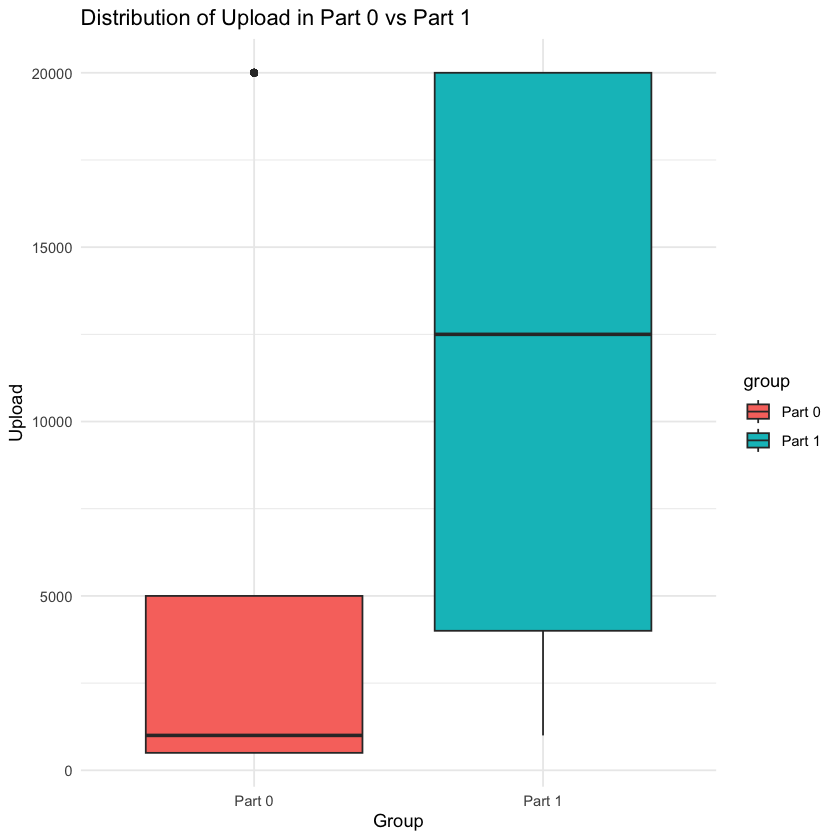

In [80]:
ggplot(combined_data, aes(x = group, y = Upload, fill = group)) +
  geom_boxplot() +
  labs(title = "Distribution of Upload in Part 0 vs Part 1",
       x = "Group",
       y = "Upload") +
  theme_minimal()

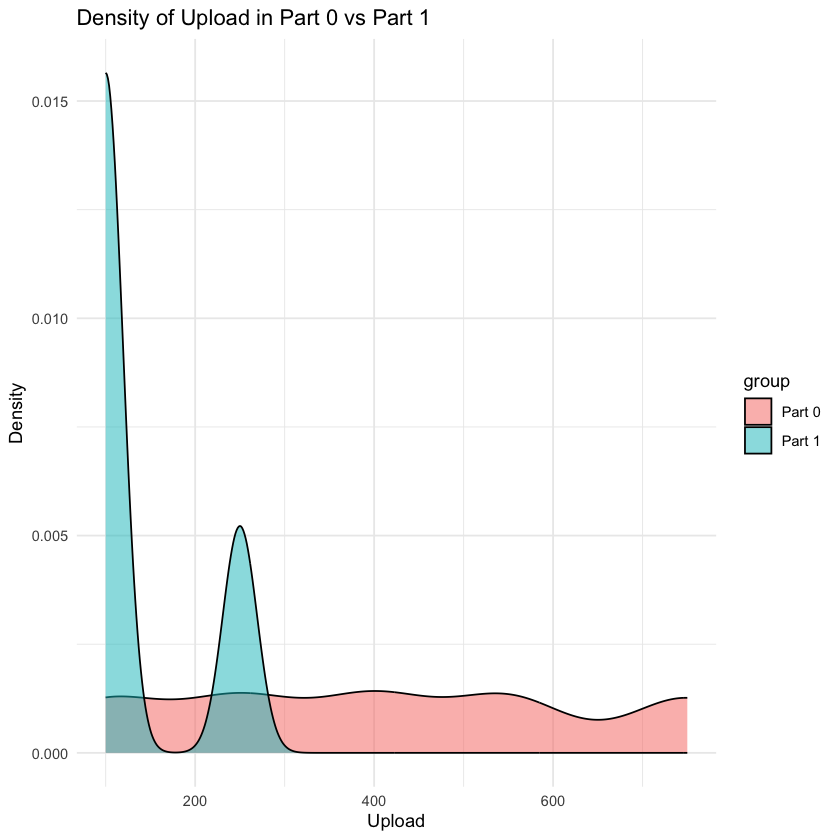

In [81]:
ggplot(combined_data, aes(x = Latency, fill = group)) +
  geom_density(alpha = 0.5) +
  labs(title = "Density of Upload in Part 0 vs Part 1",
       x = "Upload",
       y = "Density") +
  theme_minimal()

In [82]:
mean_upload_part_1 <- mean(part_1$Upload, na.rm = TRUE)
mean_upload_part_0 <- mean(part_0$Upload, na.rm = TRUE)
sd_upload_part_1 <- sd(part_1$Upload, na.rm = TRUE)
sd_upload_part_0 <- sd(part_0$Upload, na.rm = TRUE)

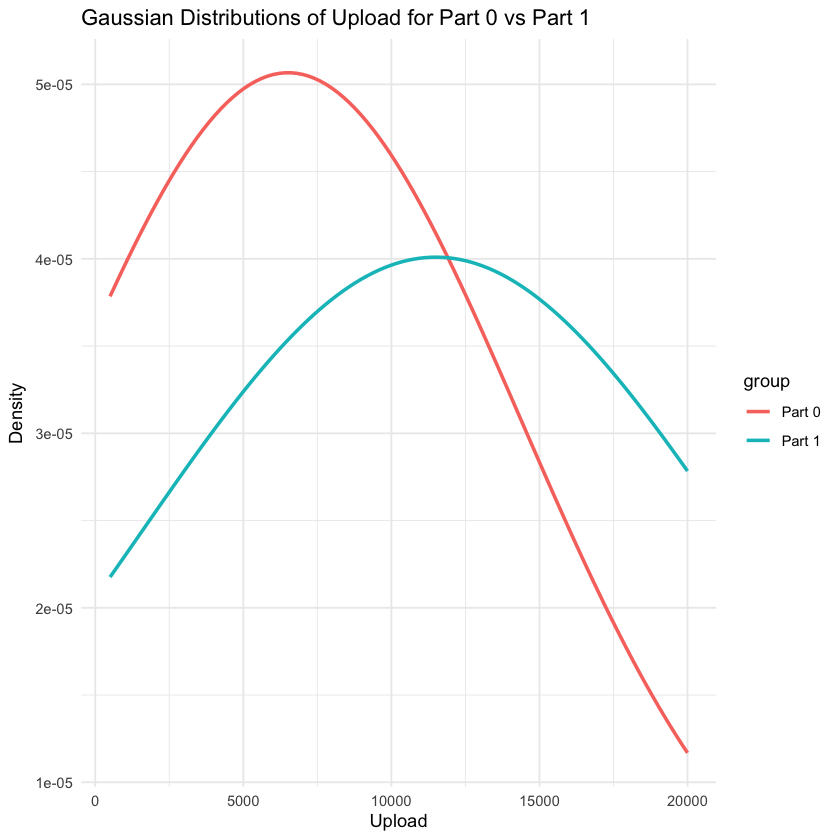

In [83]:
# Define x-values for both Gaussian curves
x_values <- seq(min(c(part_0$Upload, part_1$Upload), na.rm = TRUE),
                max(c(part_0$Upload, part_1$Upload), na.rm = TRUE), 
                length = 100)

# Calculate Gaussian values for part_0 and part_1
gaussian_values_part_0 <- dnorm(x_values, mean = mean_upload_part_0, sd = sd_upload_part_0)
gaussian_values_part_1 <- dnorm(x_values, mean = mean_upload_part_1, sd = sd_upload_part_1)

# Create data frames for plotting
gaussian_data_part_0 <- data.frame(x = x_values, y = gaussian_values_part_0, group = "Part 0")
gaussian_data_part_1 <- data.frame(x = x_values, y = gaussian_values_part_1, group = "Part 1")

# Combine the data frames
gaussian_data <- rbind(gaussian_data_part_0, gaussian_data_part_1)

# Plot both Gaussian distributions
ggplot() +
  geom_line(data = gaussian_data, aes(x = x, y = y, color = group), size = 1) +
  #geom_density(data = part_0, aes(x = Upload), fill = "red", alpha = 0.3) + # Density of part_0
  labs(title = "Gaussian Distributions of Upload for Part 0 vs Part 1",
       x = "Upload",
       y = "Density") +
  theme_minimal()


In [84]:
# Perform Mann-Whitney U Test (also known as Wilcoxon rank-sum test)
wilcox_test_result <- wilcox.test(part_0$Upload, part_1$Upload, na.rm = TRUE)
# Print the results
wilcox_test_result

wilcox_test_result_rtt <- wilcox.test(part_0$Latency, part_1$Latency, na.rm = TRUE)
# Print the results
wilcox_test_result_rtt



	Wilcoxon rank sum test with continuity correction

data:  part_0$Upload and part_1$Upload
W = 364, p-value = 0.1751
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  part_0$Latency and part_1$Latency
W = 1008.5, p-value = 0.013
alternative hypothesis: true location shift is not equal to 0


In [85]:
combined_data$Upload_Factor <- factor(combined_data$Upload, levels = c(500, 1000, 5000, 20000))
combined_data$Latency_Factor <- factor(combined_data$Latency, levels = c(100, 250, 400, 550, 750))


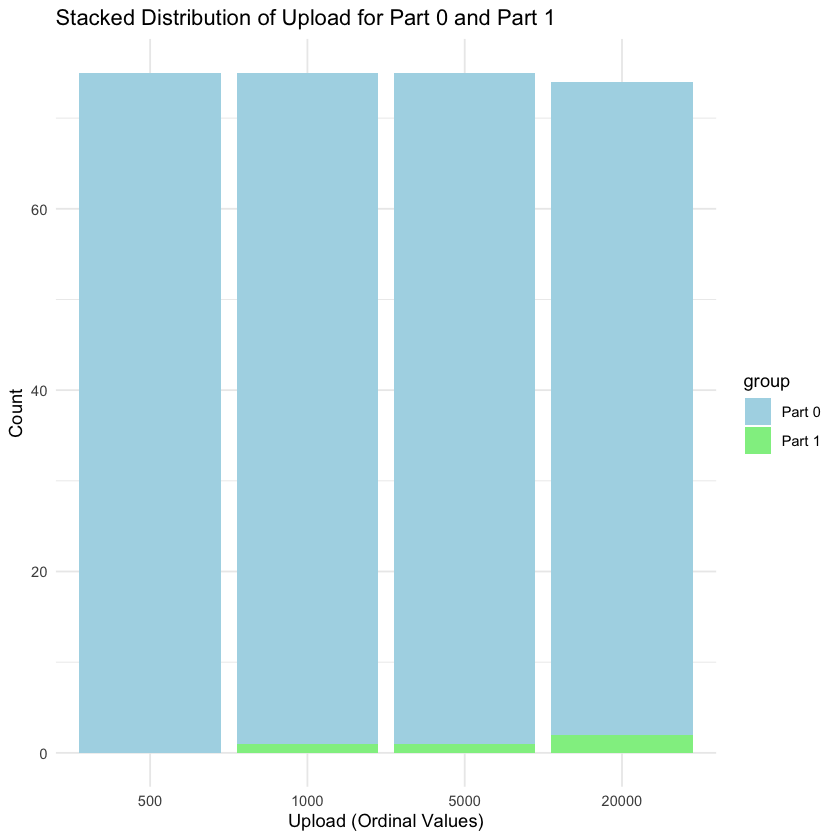

In [86]:
ggplot(combined_data, aes(x = Upload_Factor, fill = group)) +
  geom_bar() +  # Default position is stacked
  labs(title = "Stacked Distribution of Upload for Part 0 and Part 1",
       x = "Upload (Ordinal Values)",
       y = "Count") +
  scale_fill_manual(values = c("Part 0" = "lightblue", "Part 1" = "lightgreen")) +
  theme_minimal()

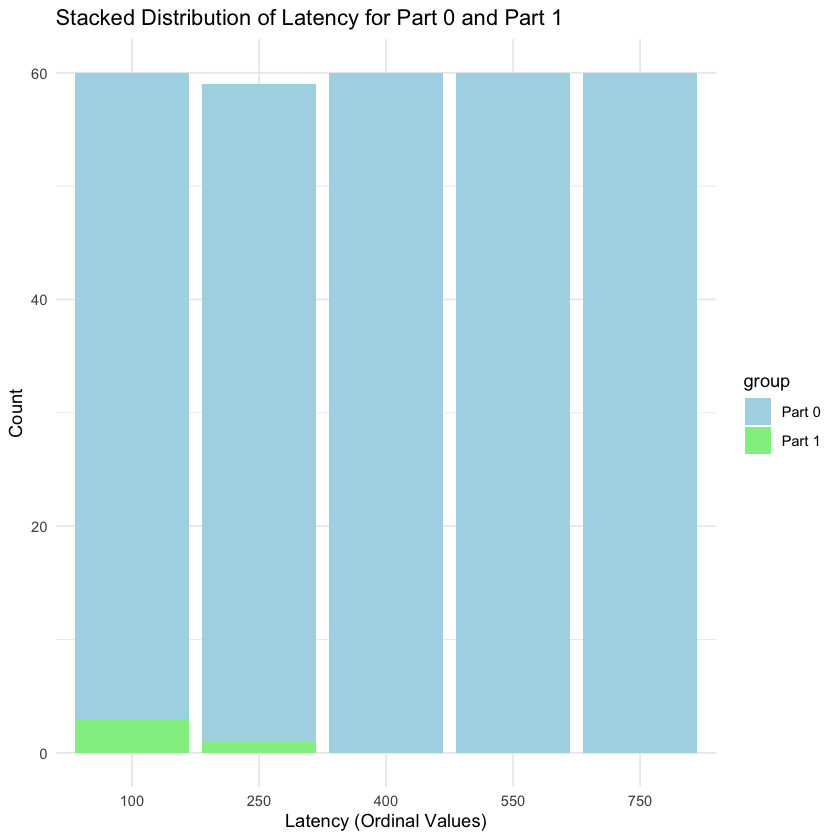

In [87]:
ggplot(combined_data, aes(x = Latency_Factor, fill = group)) +
  geom_bar() +  # Default position is stacked
  labs(title = "Stacked Distribution of Latency for Part 0 and Part 1",
       x = "Latency (Ordinal Values)",
       y = "Count") +
  scale_fill_manual(values = c("Part 0" = "lightblue", "Part 1" = "lightgreen")) +
  theme_minimal()